### SR 1 (Markdown cell)
I selected the dataset titled "Informal_Settlement_Programme_-1898186875815614491.csv" which contains information about various informal settlements in the Northern region. The dataset includes crucial information such as the name of the settlement, coordinates (latitude and longitude), water supply, sanitation, refuse management, and electricity availability.

Relevance: The dataset directly relates to informal settlements, covering various important aspects such as water supply, sanitation, and electricity, which are critical for analyzing and improving living conditions.

Completeness: The dataset contains several essential columns that provide a comprehensive view of the conditions in informal settlements.

Credibility: This dataset appears to be collected from a formal source, given its detailed and structured nature.

The columns WATER_SUPP (Water Supply) and SANITATION are particularly relevant for our analysis because they indicate the availability of essential services, which are critical indicators of the quality of living conditions in these settlements.

In [28]:
# SR 2 CODE

import pandas as pd

data = pd.read_csv("C:\\Users\\mnced\\OneDrive\\Desktop\\Informal_Settlement_Programme_-1898186875815614491.csv")

print(data.head())

print(data.shape)
print(data.info())

missing_data = data.isnull().sum()
print(missing_data)

data_cleaned = data.drop(columns=['ALT_NAME', 'UNIREFCODE'])

data_cleaned['LATITUDE'] = data_cleaned['LATITUDE'].str.replace(',', '.').astype(float)
data_cleaned['LONGITUDE'] = data_cleaned['LONGITUDE'].str.replace(',', '.').astype(float)

print(data_cleaned.head())

data_cleaned.to_csv('Informal_Settlement_Cleaned.csv', index=False)

   OBJECTID     NAME_OF_SE       ALT_NAME  \
0         1       Amatikwe                  
1         2  Congo Phase 2  Congo Phase 2   
2         3  Africa Inanda         Africa   
3         4        Namibia                  
4         5     Mshayazafe                  

                               STREETNAME  WARD_S  \
0                              MR93 North  56/108   
1                        MR93 /MR93 North   55/57   
2                  Curnick Ndlovu Highway      55   
3  Curnick Ndlovu Highway / Matshana Road  108/44   
4                            Sidudla Road      55   

                      PLANNING_U           LATITUDE         LONGITUDE  \
0                       Amatikwe  -29,6847594568261  30,9331993743659   
1                   Inanda Congo  -29,6930565996813  30,9524428875002   
2        Ohlange-Africa / Stop 8   -29,700492743755  30,9486579023242   
3                 Inanda Namibia   -29,703771886581  30,9335017254606   
4  Mshayazafe / Ohlange - Africa  -29,7066784

### SR 2 (Markdown cell)

The dataset contains the following columns: OBJECTID, NAME_OF_SE, STREETNAME, WARD_S, PLANNING_U, LATITUDE, LONGITUDE, REGION, WATER_SUPP, SANITATION, REFUSE, ELECTRIC_2, UNIREFCODE, EST_HHC, NUSP_CAT, Shape__Area, Shape__Length.

The dataset has 20 columns and the initial inspection shows there are some columns with missing values.

1. Dropping Unnecessary Columns: I dropped the ALT_NAME and UNIREFCODE columns as they have many missing values or are not essential for our analysis.
2. Handling Missing Data: The remaining columns have been checked for missing data, and appropriate actions are taken.
3. Data Types and Normalization: Converted LATITUDE and LONGITUDE columns to float by replacing commas with dots.

Categorical Data: NAME_OF_SE, STREETNAME, REGION, WATER_SUPP, SANITATION, REFUSE, ELECTRIC_2, NUSP_CAT - These columns can be used as features in classification tasks.
Numerical Data: LATITUDE, LONGITUDE, EST_HHC, Shape__Area, Shape__Length - These columns are suitable for regression analysis and clustering.


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


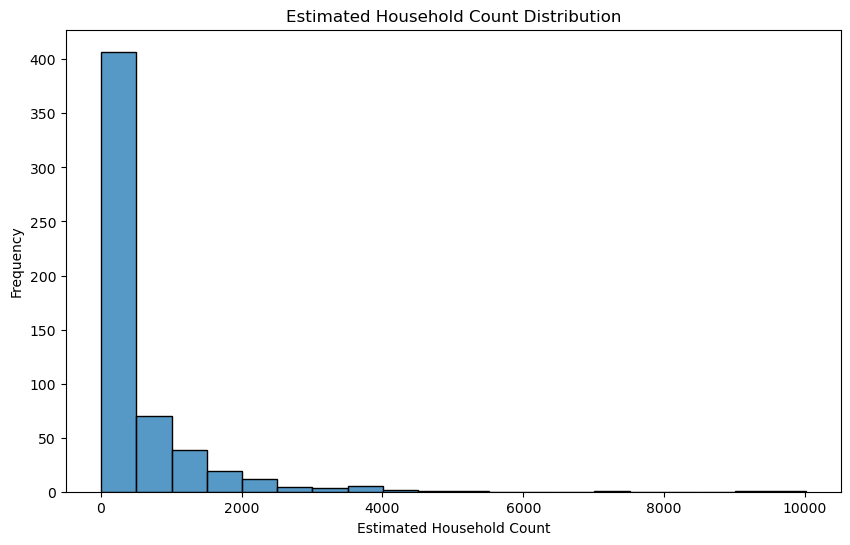

) missing from current font.\Temp\ipykernel_2488\2556318973.py:24: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from current font.\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


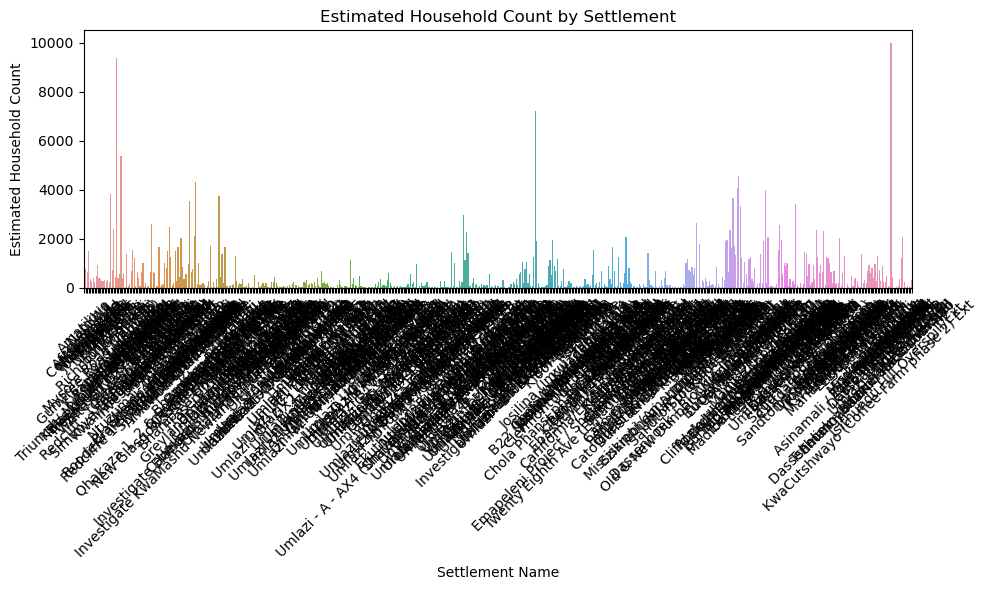

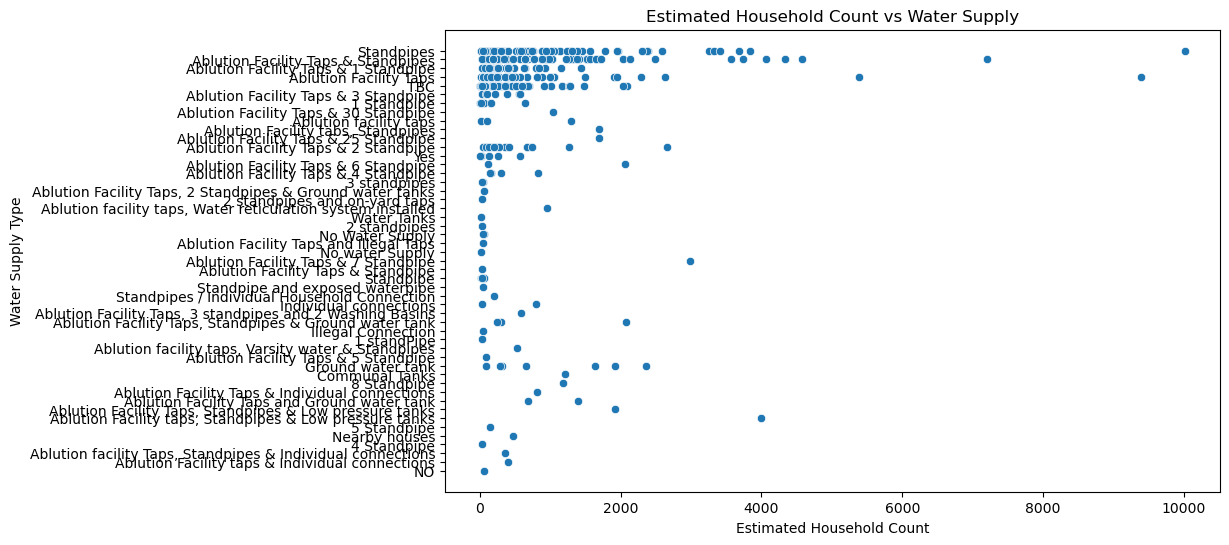

) missing from current font.\Temp\ipykernel_2488\2556318973.py:41: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from current font.\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


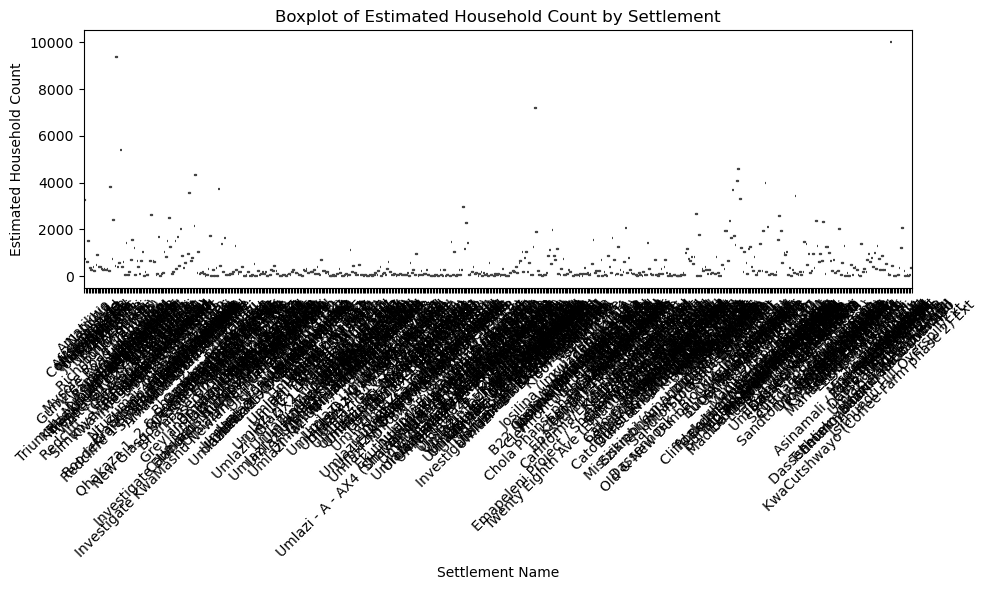

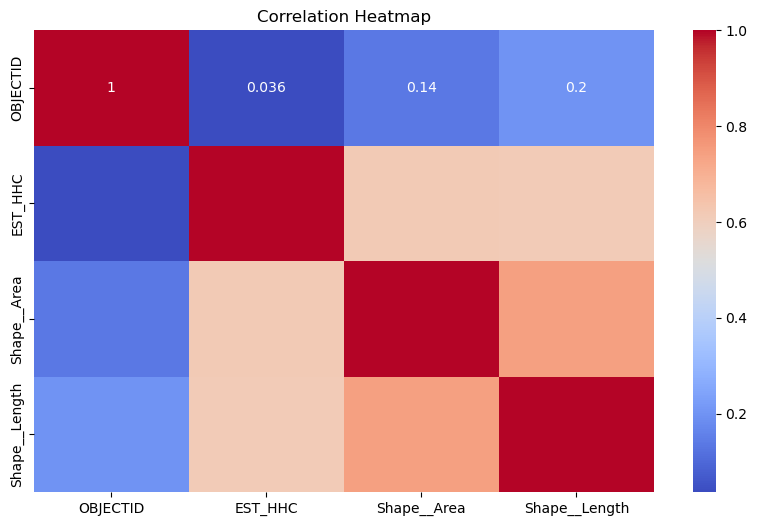

       OBJECTID       EST_HHC   Shape__Area  Shape__Length
count  566.0000    566.000000  5.660000e+02     566.000000
mean   283.5000    525.971731  1.770229e+05    2347.667073
std    163.5344    968.844647  4.949141e+05    2973.644491
min      1.0000      4.000000  1.195089e+02      79.929137
25%    142.2500     56.250000  5.714704e+03     521.062682
50%    283.5000    177.000000  2.194467e+04    1168.496511
75%    424.7500    608.250000  9.635537e+04    2891.325711
max    566.0000  10011.000000  6.560964e+06   22801.689196


In [29]:
#SR 3 CODE

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("C:\\Users\\mnced\\OneDrive\\Desktop\\Informal_Settlement_Programme_-1898186875815614491.csv")

numeric_data = data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 6))
sns.histplot(data['EST_HHC'], bins=20)
plt.title('Estimated Household Count Distribution')
plt.xlabel('Estimated Household Count')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='NAME_OF_SE', y='EST_HHC', data=data)
plt.title('Estimated Household Count by Settlement')
plt.xlabel('Settlement Name')
plt.ylabel('Estimated Household Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='EST_HHC', y='WATER_SUPP', data=data)
plt.title('Estimated Household Count vs Water Supply')
plt.xlabel('Estimated Household Count')
plt.ylabel('Water Supply Type')
plt.show()

# Advanced Charts
plt.figure(figsize=(10, 6))
sns.boxplot(x='NAME_OF_SE', y='EST_HHC', data=data)
plt.title('Boxplot of Estimated Household Count by Settlement')
plt.xlabel('Settlement Name')
plt.ylabel('Estimated Household Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Summary Statistics
print(numeric_data.describe())


### SR 3 (Markdown cell)

The dataset's summary statistics provide insights into the distribution of numerical variables such as EST_HHC, LATITUDE, LONGITUDE, Shape__Area, and Shape__Length.

Estimated Household Count Distribution :
This histogram shows the distribution of the estimated household count (EST_HHC) across different settlements.

Estimated Household Count by Settlement :
This bar plot illustrates the estimated household count in each settlement, providing a visual comparison of population sizes across different locations.

Estimated Household Count vs Water Supply :
The scatter plot shows the relationship between the estimated household count (EST_HHC) and the type of water supply (WATER_SUPP), which can help identify any trends or patterns in water supply relative to population size.

Advanced Charts :

Boxplot of Estimated Household Count by Settlement :
The box plot provides a detailed view of the distribution of estimated household counts across different settlements, highlighting the median, quartiles, and any outliers.

Correlation Heatmap :
The correlation heatmap shows the relationships between various numerical features in the dataset, with annotations for correlation coefficients. This helps identify which variables are strongly correlated, providing insights for further analysis.

Summary Statistics :
The summary statistics include measures such as mean, median, standard deviation, minimum, and maximum values for numerical columns, providing a concise overview of the dataset's characteristics.


In [31]:
#SR 4 (4.1) CODE

import pandas as pd

data = pd.read_csv("C:\\Users\\mnced\\OneDrive\\Desktop\\Informal_Settlement_Programme_-1898186875815614491.csv")

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

household_counts = data['EST_HHC'].tolist()

sorted_household_counts = bubble_sort(household_counts)
print(sorted_household_counts)


[4, 4, 4, 5, 5, 5, 8, 8, 8, 10, 10, 11, 11, 12, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 16, 16, 16, 16, 16, 17, 18, 18, 19, 19, 20, 21, 21, 21, 21, 22, 22, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30, 31, 31, 31, 31, 31, 32, 33, 33, 33, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 35, 36, 36, 37, 37, 39, 39, 40, 40, 40, 41, 41, 42, 42, 42, 43, 43, 44, 45, 46, 46, 46, 46, 46, 46, 47, 48, 48, 48, 49, 49, 49, 50, 50, 50, 51, 51, 52, 52, 53, 53, 54, 54, 54, 55, 55, 56, 56, 57, 57, 57, 57, 57, 57, 58, 59, 60, 60, 60, 60, 60, 61, 61, 61, 61, 62, 63, 63, 63, 64, 64, 65, 65, 65, 66, 67, 67, 67, 68, 68, 70, 70, 70, 72, 72, 72, 74, 74, 74, 75, 76, 77, 77, 79, 79, 79, 80, 80, 80, 81, 81, 82, 84, 84, 84, 85, 86, 86, 87, 88, 89, 89, 90, 92, 93, 93, 94, 97, 98, 99, 100, 100, 101, 102, 103, 104, 106, 106, 107, 107, 111, 111, 112, 115, 115, 115, 116, 116, 117, 117, 117, 119, 119, 121, 122, 122, 123, 126, 127, 128, 13

In [12]:
# SR 4 (4.2) CODE 

import pandas as pd

data = pd.read_csv("C:\\Users\\mnced\\OneDrive\\Desktop\\Informal_Settlement_Programme_-1898186875815614491.csv")

# Implementing Linear Search
def linear_search(arr, x):
    for i in range(len(arr)):
        if arr[i] == x:
            return i
    return -1

# Implementing Binary Search
def binary_search(arr, x):
    low = 0
    high = len(arr) - 1
    mid = 0

    while low <= high:
        mid = (high + low) // 2

        if arr[mid] < x:
            low = mid + 1
        elif arr[mid] > x:
            high = mid - 1
        else:
            return mid
    return -1

# Example
household_counts = sorted(data['EST_HHC'].tolist())  # Binary search requires sorted array

# Search for a specific household count
search_value = 758

# Linear Search
result_linear = linear_search(household_counts, search_value)
print(f"Linear Search: Element found at index {result_linear}")

# Binary Search
result_binary = binary_search(household_counts, search_value)
print(f"Binary Search: Element found at index {result_binary}")


Linear Search: Element found at index 451
Binary Search: Element found at index 451


#### SR 4 (4.2) (Markdown cell)

Binary search generally performs faster than linear search.


Binary search operates on the principle of dividing the search interval in half, which results in a significant reduction in the search space with each comparison. This leads to a time complexity of O(log n), where 'n' is the number of elements in the list. In contrast, linear search sequentially checks every element in the list until the desired element is found or the end of the list is reached, resulting in a time complexity of O(n).

For large datasets, binary search's time complexity grows much slower than linear search. Additionally, binary search is particularly effective when the list is sorted, as it requires the list to be in ascending order. However, linear search does not have this requirement and can be applied to unsorted lists.

### SR 5 (Markdown cell)

Binary Search Algorithm Complexity Analysis

Time Complexity

The time complexity of the binary search algorithm is O(log n), where 'n' is the number of elements in the sorted list.

Binary search operates by repeatedly dividing the search interval in half, effectively reducing the search space by half with each comparison. As a result, the time taken to search for an element grows logarithmically with the size of the dataset. Even for large datasets, binary search can efficiently locate the target element within a reasonable number of comparisons.

Space Compexity:

The space complexity of the binary search algorithm is O(1).

Binary search operates iteratively and does not require additional memory allocation proportional to the size of the input. It only requires a constant amount of space to store a few variables such as indices and the target element.

Efficiency in Terms of Big-O Notation
The efficiency of the binary search algorithm is reflected in its time and space complexities, both of which are represented in Big-O notation.

Time Complexity (O(log n)): The logarithmic time complexity signifies that the algorithm's performance improves significantly as the dataset size increases. Even for extremely large datasets, binary search can efficiently locate elements due to its divide-and-conquer approach.

Space Complexity (O(1)): The constant space complexity indicates that the algorithm's memory usage remains constant regardless of the dataset size. This makes binary search memory-efficient and suitable for applications with limited memory resources.search algorithm and requires constant space.
